<h1><center>Non-local games and it's relation with Bell inequalities</center></h1>

Non-local games are a good example to show how quantum entanglement might help us to get better results in XOR games.

For this example, we are focused to study the CHSH game, based on the CHSH inequality, but before starting we have to do some definitions to clarify the scenario in which we will play and the language we are going to use.

In this kind of game, there are two players, Alice and Bob, who cooperate with each other to win. For this, they must respond to the question made for the referee (also called the verifier). The players win the game if they answer correctly the question made for the referee. It is important to make clear that, after to receive the question, Alice and Bob can't communicate each other. 

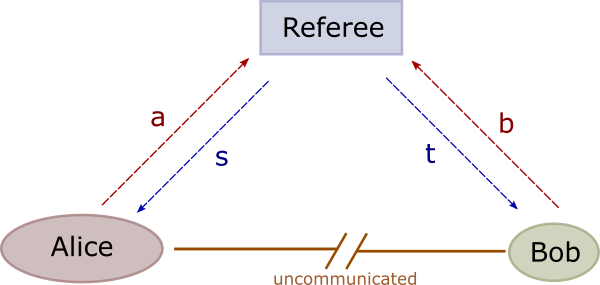

Some mathematician definitions will help us to describe the situation. Let $\pi$ be a probability distribution for all the questions that the referee may ask, that is $(s,t) \in S \times T$. Alice must send her to answer $a \in A$ to the referee, the same as Bob with $b \in B$. Let $V$ be a function (called predicate) of $(s,t,a,b)$ that evaluates if Alice and Bob answer correctly the questions $(s,t)$. The players win the game if $V = 1$, or lose otherwise.

The rules for the CHSH game are, then, simple to understand. Let $S=T=A=B= \{ 0,1 \}$ and consider $\pi$ an uniform distribution for $S \times T$. Then, the predicate is

\begin{equation}
V (a,b|s,t) = 
\begin{cases}
1, \mathrm{\ if\ } s \cdot t = a\oplus b\\
0, \mathrm{\ otherwise} \\
\end{cases}
\end{equation}

Then, the probability that the players win the game is given by

\begin{equation}
p_{\mathrm{win}} = \frac{1}{4} \sum_{a,b,s,t} V (a,b|s,t) p (a,b|s,t).
\end{equation}

So, if the referee sends a bit 00, 01, or 10, then Alice and Bob must send the same bit. Then, before the game start, they agree to always send back to the referee the bit 00 (or 11). With this, they win in three of the four possibilities depending on the bit sent by the referee, thus the winning probability is $75 \%$. This is the best strategy for the players, apparently.

Let $\alpha$ the win probability $p_{w}$ minus the lose probability $p_{l}$. If $p_{w} \leq 3/4$, since $p_w + p_l = 1$, then $\alpha \leq 1/2$. Now we define $S_{\mathrm{CHSH}} := 4 \alpha$ and, for a classical strategy, this quantity must satisfy 
\begin{equation}
| S_{\mathrm{CHSH}} | \leq 2.
\end{equation}

**Unfortunately, the direct implementation of Bell's inequality from a predicate is not trivial, so we will do a mathematical treatment to deduce it and then simulate a circuit created based on it.** 

Suppose that Alice and Bob are allowed to use a quantum strategy, that is, they are to be able to share an entangled quantum state
\begin{equation}
| \Psi \rangle_{\mathrm{A}\mathrm{B}} = \frac{1}{\sqrt{2}} (| 0 \rangle_{\mathrm{A}} | 0 \rangle_{\mathrm{B}} + |  1\rangle_{\mathrm{A}} | 1 \rangle_{\mathrm{B}} ),
\end{equation}
this won't break the rules because they are still separate and without communicating with each other.


We can expect that, a quantum strategy, involves measurements. So, let $\{ \Pi_{a}^{(s)} \}$ the local projective measurement made by Alice, where $\sum_a \Pi_{a}^{(s)} = I$. Similarly, let $\{ \Pi_{b}^{(t)} \}$ the local projective measurement made by Bob, where $\sum_a \Pi_{b}^{(t)} = I$. The, the winning probability is given by

\begin{equation}
p_{\mathrm{win}} = \frac{1}{4} \sum_{a,b,s,t} V (a,b|s,t) \langle \Psi |_{\mathrm{A}
\mathrm{B}} \Pi_{a}^{(s)} \otimes \Pi_{b}^{(t)} | \Psi \rangle_{\mathrm{A}\mathrm{B}}.
\end{equation}

Like the classical strategy, Alice and Bob focus on the cases where the referee sends the bits 00, 01, and 10. With this, the players win if they send back the same bit. Let $p_w$ the probability for this, then
\begin{equation}
p_w = \langle \Psi |_{\mathrm{A}\mathrm{B}} \Pi_{0}^{(s)} \otimes \Pi_{0}^{(t)} + \Pi_{1}^{(s)} \otimes \Pi_{1}^{(t)} | \Psi  \rangle_{\mathrm{A}\mathrm{B}},
\end{equation}
whereas the probability of sending back a different bit is
\begin{equation}
p_l = \langle \Psi |_{\mathrm{A}\mathrm{B}} \Pi_{0}^{(s)} \otimes \Pi_{1}^{(t)} + \Pi_{1}^{(s)} \otimes \Pi_{0}^{(t)} | \Psi  \rangle_{\mathrm{A}\mathrm{B}}.
\end{equation}

Then, the winning probability less the loss probability may be written as
\begin{equation}
\alpha = \langle \Psi |_{\mathrm{A}\mathrm{B}} \Pi_{0}^{(s)} \otimes \Pi_{0}^{(t)} + \Pi_{1}^{(s)} \otimes \Pi_{1}^{(t)} - \Pi_{0}^{(s)} \otimes \Pi_{1}^{(t)} - \Pi_{1}^{(s)} \otimes \Pi_{0}^{(t)} | \Psi  \rangle_{\mathrm{A}\mathrm{B}} =
\langle \Psi |_{\mathrm{A}\mathrm{B}} A^{(s)} \otimes B^{(t)} | \Psi  \rangle_{\mathrm{A}\mathrm{B}},
\end{equation}
with
\begin{align}
A^{(s)} &= \Pi_{0}^{(s)} - \Pi_{1}^{(s)},\\
B^{(t)} &= \Pi_{0}^{(t)} - \Pi_{1}^{(t)}.
\end{align}

Let
\begin{equation}
S = A^{(0)} \otimes B^{(0)} + A^{(0)} \otimes B^{(1)} + A^{(1)} \otimes B^{(0)} - A^{(1)} \otimes B^{(1)}.
\end{equation}

Then, let's use our module to find the value of $S$. For this, the first step is to call our module called *bell_checker* (with all the others ones that are necessary).

In [7]:
import qiskit
from qiskit import QuantumCircuit, Aer
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview

import numpy as np

import bell_checker
import bell_checker.graphs_tools as GraphsTools
import bell_checker.circuit_maker

To compute the measurements made for Alice and Bob we have to define our observables.

In [8]:
obs = [ [ np.eye(2), np.array([ [1,1], [1,-1] ])/np.sqrt(2)],
         [ np.eye(2), np.array([ [1,1], [1,-1] ])/np.sqrt(2) ]]

Then, we introduce the Bell inequality that we are looking to implement that is, in our case, the CHSH inequality.

In [9]:
S = 2                                                                   # Classical bound for S
Sabxy = [(1,-1,-1,1), (1,-1,-1,1), (-1,1,1,-1), (1,-1,-1,1)]            # The observables for Alice and Bob

Notice that we obtained the inequality in terms of the expectation values before, but for our module, it's necessary to introduce those quantities in terms of probabilities. We do this on purpose in our show because that leads us to make a simpler generalization to other Bell inequalities.

Now, we prepare an entangled state to introduce in our circuit after.

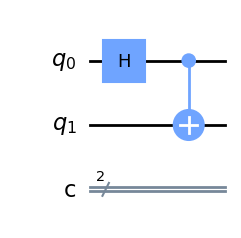

In [10]:
init_state = QuantumCircuit(len(obs), len(obs) )        # We prepare the initial state with the parameters needed for qiskit
init_state.h(0)                                         # Introduce a Hadamard gate
init_state.cx(0,1)                                      # Introduce a CNOT gate
init_state.draw(output='mpl')                           # We show the basic circuit to create an entangled state

After this, we use our module to create a circuit for test the inequality.

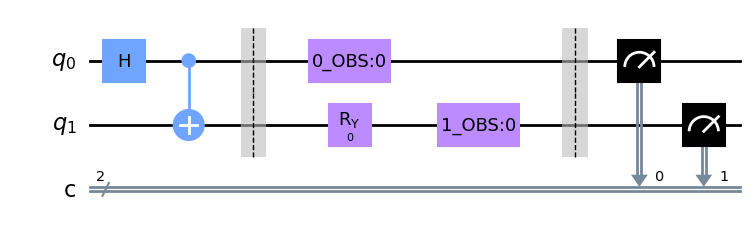

In [11]:
circuits        = CircuitMaker(auto=True)                               # Use the function CircuitMaker to evaluate the given Bell inequality
bell_circuits   = []                                                    # Create a scenario where we will put the different parts of the circuit
bell_circuits   = circuits.constructor( init_state, obs )               # Construct the circuits needed to evaluate the Bell inequality
bell_circuits[0].draw(output='mpl')                                     # We show the final circuit before to simulate it

Now we prepare the setup to simulate the CHSH inequality. Let's get the counts and see if we broke the inequality or not.

In [12]:
circuits.backend_run()                         # We start the simulation of the circuit with the state prepared before
result = circuits.witness(Sabxy, S)            # The module tell us if we broke the inequality.

AttributeError: 'list' object has no attribute 'all'

**WE BROKE THE INEQUALITY FOR A ENTANGLED STATE!!!** What does this mean for the game? This means that with a quantum strategy we have a bigger probability to win.

In particular, we get that $S \approx 2.06$ which means that the winning probability is $p_w = 75.75\%$. In general, the winning probability in terms of S is given by
\begin{equation} 
p_w = \frac{1}{2} \left( \frac{S}{4} + 1 \right).
\end{equation} 

Note that sometimes the inequality doesn't break, that's because we're not choosing the best observables to show this effect.

Let's repeat the script but choose multiple bases and see what is the maximum value of $S$ that we get.

In [ ]:
number_of_thetas = 15                                                                                  
theta_vec = np.linspace(0,2*np.pi,number_of_thetas)
theta_list = [[k] for k in theta_vec]                    # We create a list with multiples values of angles to rotate the observables

Same as before, we create a circuit for each value of the rotation.

In [ ]:
circuits        = CircuitMaker()
bell_circuits   = []

for theta in theta_list:
    temp_circuits   = circuits.constructor( init_state, obs , theta )
    for circuit in temp_circuits:
        bell_circuits.append(circuit)                                          # We construct a circuit for each rotation

bell_circuits[0].draw(output='mpl')

We should start the simulation using the command backend_run() shown before. Unfortunately, it is not possible right now to use that function for multiple circuits. So, we will do it manually.

In [ ]:
simulator = Aer.get_backend('aer_simulator')        # We call the simulator
job = simulator.run( bell_circuits, shots=1024 )    # We simulate those circuits
results = job.result( )                             # We get the results from the simulation
counts = results.get_counts( )                      # We create an array with the counts obtained from the simulation

Notice that now we break the inequality multiple times.

In [ ]:
result = circuits.witness(Sabxy, S, counts)

We use the function g1D from our module to create a plot to see the different values of $S$ for each simulation.

In [ ]:
GraphsTools.g1D(S=S, t = theta_vec, v = result)

We see that the maximum value of $S$ is so close to 3. That is what we expect because the maximum value of $S$ is given by Tsirelson's bound, which for CHSH inequality, is $S = 2 \sqrt 2$. With this, we compute the maximum winning probability and we get that $p_w = 85\%$.  That's an extra 10% to win than using a classic strategy.

In [ ]:
# proponer mas juegos con distitos predicados